ERSIP Lab Sessions    
Lab 2: Point-based processing  
22-09-2025

In [1]:
# computing a histogram
import numpy as np
import time
import rasterio

In [ ]:
img = rasterio.open(r"Data\spot2005_pansharpened_utm33_subset_NIRRGMIR.tif")
input =img.read(1)

In [10]:
# naive approach 
start = time.process_time()

hist=np.zeros(256,dtype=int)
values=input.flatten()
for v in range(len(hist)):
    for i in values:
        if i==v:
            hist[v]+=1

end = time.process_time()
print("Naive approach time:", end - start)

Naive approach time: 17.734375


In [ ]:
# efficient 
start = time.process_time()

hist=np.zeros(256,dtype=int)
values=input.flatten()
for i in values:
    hist[i]+=1

end = time.process_time()
print("Efficient approach time:", end - start)

# efficient 2
start = time.process_time()

hist=np.histogram(input,256,range=(0,255))[0]

end = time.process_time()
print("Efficient 2 approach time:", end - start)

Efficient approach time: 0.15625


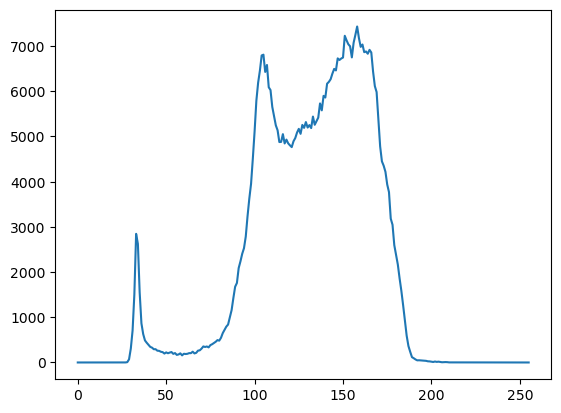

In [ ]:
# plot histogram
import matplotlib.pyplot as plt

plt.plot(hist)


In [ ]:
# Automatic contrast stretching
nz=np.nonzero(hist)[0]
min,max=nz[0],nz[-1]
print("min:",min," max:",max)  

min: 23  max: 243


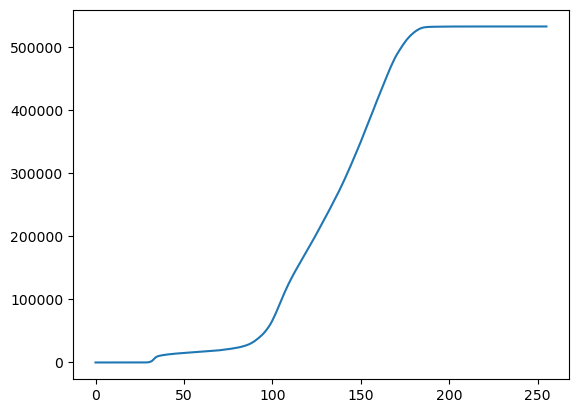

In [20]:
# cumulative histogram
chist=hist
for i in range(1,len(hist)):
    chist[i]=chist[i-1]+hist[i]

plt.plot(chist)